In [1]:
%reload_ext autoreload
%autoreload 2

In [9]:
import nelpy as nel
import numpy as np
import matplotlib.pyplot as plt
from ripple_heterogeneity.utils import loading
import statistics
from nelpy.auxiliary import _position


In [86]:
basepath = r"Z:\Data\AYAold\AYA7\day20"
beh_df = loading.load_animal_behavior(basepath)
pos = nel.AnalogSignalArray(
    data=np.array(beh_df.linearized),
    timestamps=beh_df.time,
    fs=1 / statistics.mode(np.diff(beh_df.time)),
)


C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


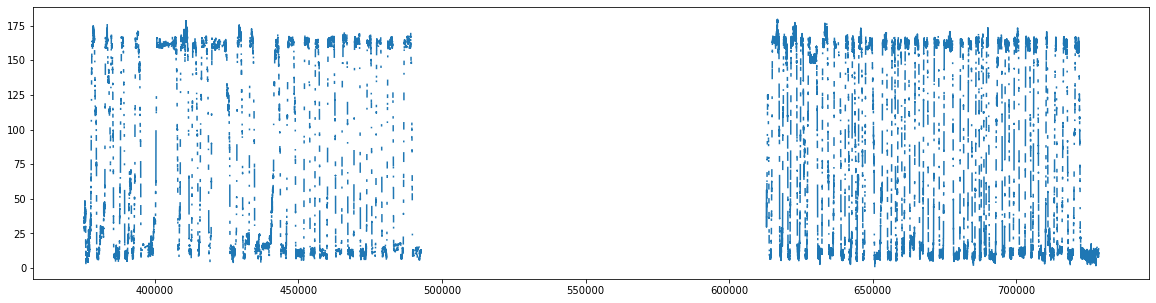

In [87]:
plt.figure(figsize=(20, 5))
plt.plot(beh_df.x)


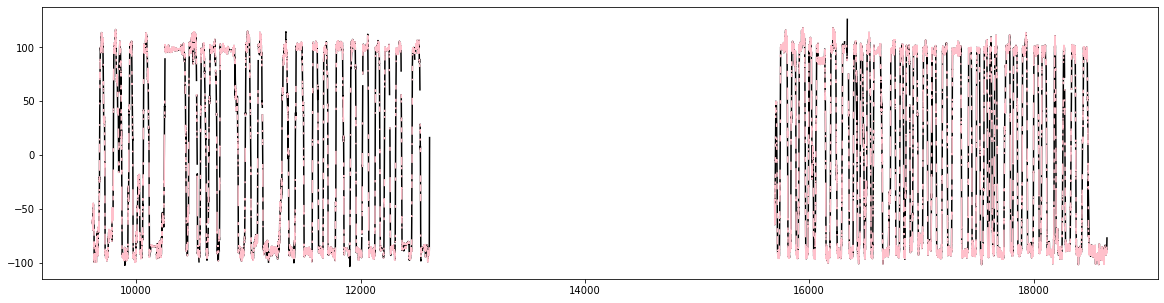

In [91]:
plt.figure(figsize=(20, 5))

plt.plot(beh_df.time,
    beh_df.linearized.interpolate(
        method="spline",
        order=2,
        limit=int(1 / statistics.mode(np.diff(beh_df.time)))*2,
    ),
    color="k",
)

plt.plot(beh_df.time,beh_df.linearized,color="pink")
# plt.xlim([10000,11250])

In [81]:
beh_df.linearized = beh_df.linearized.interpolate(
    method="spline",
    order=2,
    limit=int(1 / statistics.mode(np.diff(beh_df.time))) * 2,
)


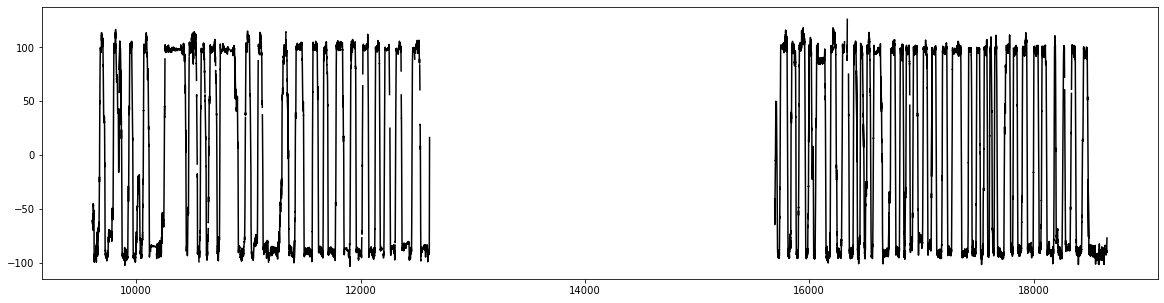

In [85]:
plt.figure(figsize=(20, 5))

plt.plot(beh_df.time,beh_df.linearized,color="k")


In [38]:
# pos = nel.AnalogSignalArray(
#     data=np.array(beh_df.linearized),
#     timestamps=beh_df.time,
#     fs=1 / statistics.mode(np.diff(beh_df.time)),
# )
# pos = _position.PositionArray(np.array(beh_df.linearized).T,
#                     abscissa_vals=beh_df.time,
#                     fs=1 / statistics.mode(np.diff(beh_df.time)))

pos = _position.PositionArray(pos)


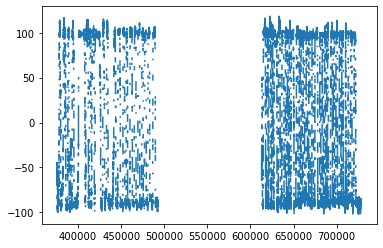

In [39]:
plt.plot(pos.data.T)


In [29]:
pos.fs


39.06250000009104

In [40]:
pos.smooth(Kalman=False, inplace=True)


<1D PositionArray at 0x1d553309fd0> for a total of 5:11:22:137 hours

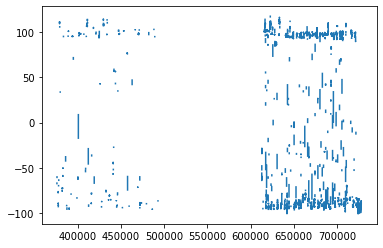

In [41]:
plt.plot(pos.data.T)


In [36]:
np.isnan(pos.data).all()


True